In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import scaling as sca
import nn1 as nn

In [14]:
from pathlib import Path
project_root= Path.cwd()
filepath_load = str(project_root)+"/data/raw/pr_water_rho.csv"
rho_orig = pd.read_csv(filepath_load)

In [15]:
rho_norm = sca.scaling_load(rho_orig)

In [16]:
x_train,x_test,y_train,y_test = nn.split_data(rho_norm)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 2), (2000, 2), (8000, 2), (2000, 2))

In [17]:
tf.random.set_seed(42)

In [18]:
model1 = nn.build_rho_model()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 2)                 42        
                                                                 
Total params: 6412 (25.05 KB)
Trainable params: 6412 (25.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
h1 = model1.fit(x_train, y_train,
                    epochs=50,
                    batch_size = 32,
                    validation_data=(x_test, y_test))

Epoch 1/50
250/250 [==============================] - 0s 1ms/step - loss: 56.9993 - mape: 56.9993 - val_loss: 56.8268 - val_mape: 56.8268
Epoch 2/50
250/250 [==============================] - 0s 982us/step - loss: 54.5781 - mape: 54.5781 - val_loss: 53.7567 - val_mape: 53.7567
Epoch 3/50
250/250 [==============================] - 0s 961us/step - loss: 51.6195 - mape: 51.6195 - val_loss: 50.7248 - val_mape: 50.7248
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 48.8284 - mape: 48.8284 - val_loss: 48.5069 - val_mape: 48.5069
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 47.1545 - mape: 47.1545 - val_loss: 46.9748 - val_mape: 46.9748
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 45.8258 - mape: 45.8258 - val_loss: 45.5460 - val_mape: 45.5460
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 44.6044 - mape: 44.6044 - val_loss: 44.3528 - val_mape: 44.3528
Epoch 8/50
250/250 [==========

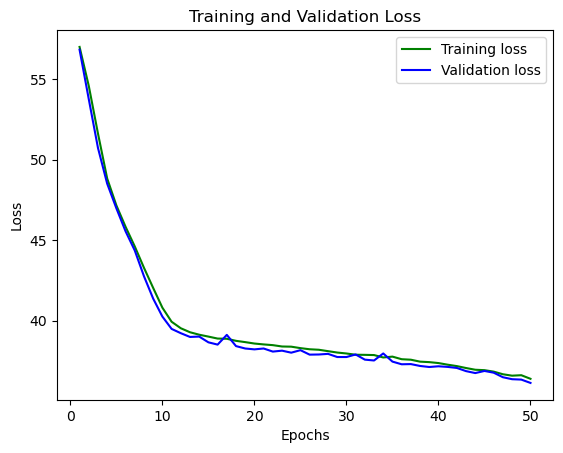

In [25]:
nn.plot_loss(h1)

In [27]:
h2 = model1.fit(x_train, y_train,
                    epochs=50,
                    batch_size = 32,
                    validation_data=(x_test, y_test),
                    callbacks=[h1])

Epoch 1/50
250/250 [==============================] - 0s 870us/step - loss: 36.2964 - mape: 36.2964 - val_loss: 36.2381 - val_mape: 36.2381
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 36.2091 - mape: 36.2091 - val_loss: 35.9879 - val_mape: 35.9879
Epoch 3/50
250/250 [==============================] - 0s 879us/step - loss: 36.0866 - mape: 36.0866 - val_loss: 36.0812 - val_mape: 36.0812
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 35.9845 - mape: 35.9845 - val_loss: 35.7892 - val_mape: 35.7892
Epoch 5/50
250/250 [==============================] - 0s 685us/step - loss: 35.8156 - mape: 35.8156 - val_loss: 35.7018 - val_mape: 35.7018
Epoch 6/50
250/250 [==============================] - 0s 990us/step - loss: 35.7509 - mape: 35.7509 - val_loss: 35.5831 - val_mape: 35.5831
Epoch 7/50
250/250 [==============================] - 0s 659us/step - loss: 35.5839 - mape: 35.5839 - val_loss: 35.3564 - val_mape: 35.3564
Epoch 8/50
250/250 [====

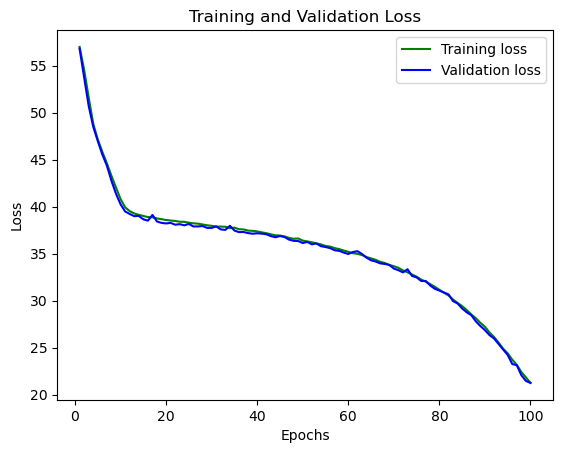

In [28]:
nn.plot_loss(h2)

In [29]:
h3 = model1.fit(x_train, y_train,
                    epochs=100,
                    batch_size = 32,
                    validation_data=(x_test, y_test),
                    callbacks=[h2])

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 20.8962 - mape: 20.8962 - val_loss: 20.6435 - val_mape: 20.6435
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 20.5306 - mape: 20.5306 - val_loss: 20.6322 - val_mape: 20.6322
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 20.4596 - mape: 20.4596 - val_loss: 20.6038 - val_mape: 20.6038
Epoch 4/100
250/250 [==============================] - 0s 820us/step - loss: 20.0396 - mape: 20.0396 - val_loss: 19.9629 - val_mape: 19.9629
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 19.8379 - mape: 19.8379 - val_loss: 19.7717 - val_mape: 19.7717
Epoch 6/100
250/250 [==============================] - 0s 787us/step - loss: 19.6068 - mape: 19.6068 - val_loss: 19.6640 - val_mape: 19.6640
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 19.4925 - mape: 19.4925 - val_loss: 19.7050 - val_mape: 19.7050
Epoch 8/100
250/250 [==

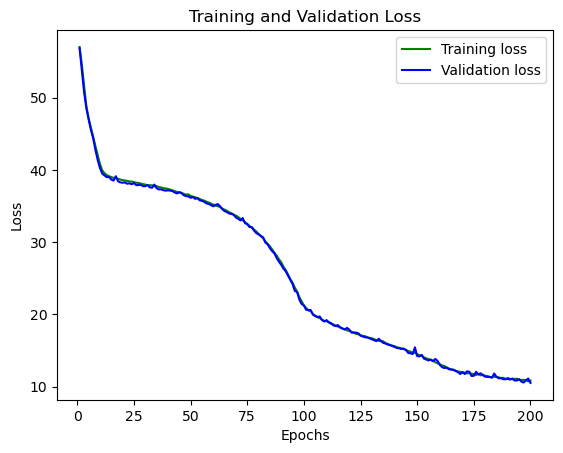

In [30]:
nn.plot_loss(h3)

In [31]:
h4 = model1.fit(x_train, y_train,
                    epochs=100,
                    batch_size = 32,
                    validation_data=(x_test, y_test),
                    callbacks=[h3])

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 10.6828 - mape: 10.6828 - val_loss: 10.9554 - val_mape: 10.9554
Epoch 2/100
250/250 [==============================] - 0s 823us/step - loss: 10.6936 - mape: 10.6936 - val_loss: 10.5639 - val_mape: 10.5639
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 10.6746 - mape: 10.6746 - val_loss: 10.8228 - val_mape: 10.8228
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 10.6163 - mape: 10.6163 - val_loss: 10.5186 - val_mape: 10.5186
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 10.5682 - mape: 10.5682 - val_loss: 10.3139 - val_mape: 10.3139
Epoch 6/100
250/250 [==============================] - 0s 866us/step - loss: 10.5203 - mape: 10.5203 - val_loss: 10.3016 - val_mape: 10.3016
Epoch 7/100
250/250 [==============================] - 0s 884us/step - loss: 10.6613 - mape: 10.6613 - val_loss: 10.3007 - val_mape: 10.3007
Epoch 8/100
250/250 [

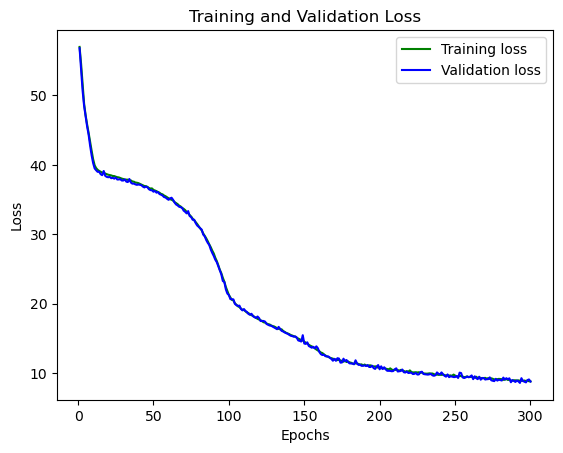

In [32]:
nn.plot_loss(h4)

In [34]:
tf.keras.backend.set_value(model1.optimizer.learning_rate, 1e-5)

In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True,
)
h5 = model1.fit(x_train, y_train,
                    epochs=500,
                    batch_size = 32,
                    validation_data=(x_test, y_test),
                    callbacks=[h4,early_stopping])

Epoch 1/500
250/250 [==============================] - 0s 1ms/step - loss: 8.5536 - mape: 8.5536 - val_loss: 8.4516 - val_mape: 8.4516
Epoch 2/500
250/250 [==============================] - 0s 1ms/step - loss: 8.5303 - mape: 8.5303 - val_loss: 8.4347 - val_mape: 8.4347
Epoch 3/500
250/250 [==============================] - 0s 1ms/step - loss: 8.5345 - mape: 8.5345 - val_loss: 8.4382 - val_mape: 8.4382
Epoch 4/500
250/250 [==============================] - 0s 1ms/step - loss: 8.5407 - mape: 8.5407 - val_loss: 8.4284 - val_mape: 8.4284
Epoch 5/500
250/250 [==============================] - 0s 1ms/step - loss: 8.5255 - mape: 8.5255 - val_loss: 8.4383 - val_mape: 8.4383
Epoch 6/500
250/250 [==============================] - 0s 733us/step - loss: 8.5307 - mape: 8.5307 - val_loss: 8.4299 - val_mape: 8.4299
Epoch 7/500
250/250 [==============================] - 0s 1ms/step - loss: 8.5229 - mape: 8.5229 - val_loss: 8.4237 - val_mape: 8.4237
Epoch 8/500
250/250 [==============================] 

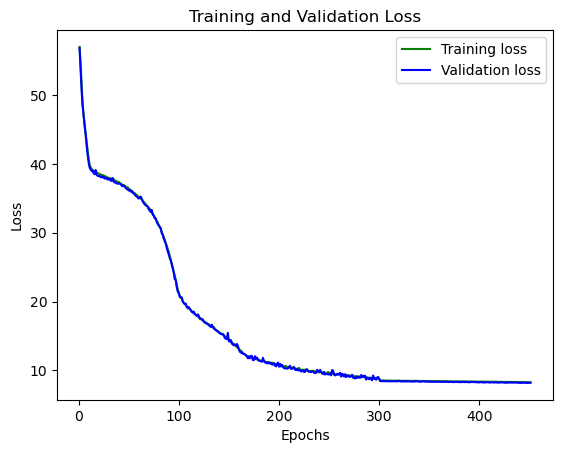

In [36]:
nn.plot_loss(h4)